In [10]:
import numpy as np
import os, sys, scipy
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
import scikits.bootstrap as bootstrap  
from scipy.stats.stats import spearmanr
import scipy.io as sio
from necessary_analysis_scripts import prettify_plot, calculate_aprime, load_data, run_stats, run_stats_1d

# Plotting defaults 

In [11]:
#plot within jupyter notebooks
%matplotlib inline 

#tab completion for files
%config IPCompleter.greedy=True 

#supress scientific notation
np.set_printoptions(suppress=True) 

#font defaults
plt.rcParams.update({'font.size': 14})
rc('text', usetex=False)
plt.rcParams['pdf.fonttype'] = 42
if os.path.isfile("/Library/Fonts/HelveticaNeue-Light.ttf"): 
    prop = fm.FontProperties(fname="/Library/Fonts/HelveticaNeue-Light.ttf",size=24)
else:
    prop = fm.FontProperties(size=24)

#color defaults
col_corr = [0/255.,98/255.,100/255.]
col_incorr = [218/255.,66/255.,36/255.]

# Load data

In [12]:
#project directory 
project_name = 'expt3c'

#load data 
subj_dat = load_data(project_name,behav_dir = '/')

#basic project information
nsubj = len(subj_dat)
print(nsubj)
nb = 4
nt = 800
nprobes = 160
ninfreq = 320
ncolors = 9
setsize = 6

['1206181_wmPrecis01' '1206182_wmPrecis01' '1206183_wmPrecis01'
 '1207181_wmPrecis01' '1207183_wmPrecis01' '1207184_wmPrecis01'
 '1207185_wmPrecis01' '1207186_wmPrecis01' '1207187_wmPrecis01'
 '1207188_wmPrecis01' '1207189_wmPrecis01' '1208181_wmPrecis01'
 '1208182_wmPrecis01' '1208183_wmPrecis01' '1208184_wmPrecis01'
 '1208185_wmPrecis01' '1208186_wmPrecis01' '1208187_wmPrecis01'
 '1208188_wmPrecis01' '1208189_wmPrecis01' '1210181_wmPrecis01'
 '1210182_wmPrecis01' '1210183_wmPrecis01']
23


# Working memory performance 

Let's examine the performance in the working memory task

In this continuous report working memory task, participants respond to the color of the items by clicking along a continuous wheel

Working memory performance:	 9.78 [ 9.05 10.78]


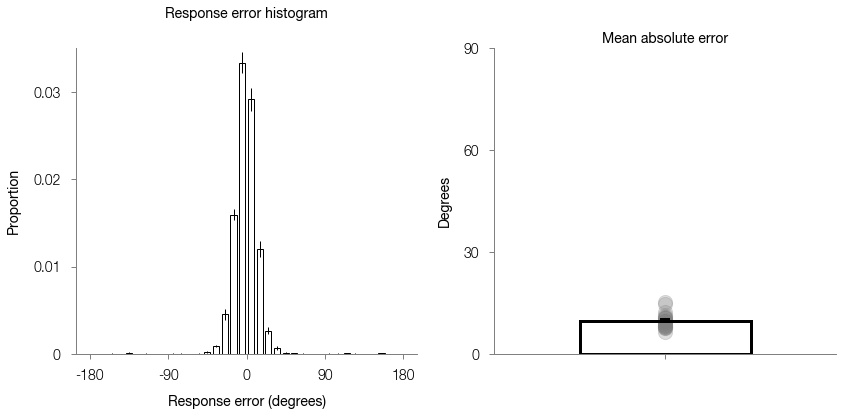

0.07337360185358956 [0.05691615 0.09457156]
71.17260306160435 [55.47849134 91.60006343]


In [13]:
bin_width=10.
bins = np.arange(-180,180+bin_width,bin_width)
bin_height = np.empty((nsubj,np.size(bins)-1))
x = bins[:-1]+bin_width/2
wm_degdiff_m=np.zeros((nsubj))
wm_degdiff_min=np.zeros((nsubj))
wm_degdiff_max=np.zeros((nsubj))

#calculate working memory performance
for isubj in range(nsubj):
    iprobe = ~np.isnan(subj_dat[isubj].wm_respcolorminusorigcolor)
    bin_height[isubj],_ = np.histogram(subj_dat[isubj].wm_respcolorminusorigcolor[iprobe],bins,density=True)
    wm_degdiff_m[isubj] = np.mean(np.abs(subj_dat[isubj].wm_respcolorminusorigcolor[iprobe]))
    wm_degdiff_min[isubj] = np.min(np.abs(subj_dat[isubj].wm_respcolorminusorigcolor[iprobe]))
    wm_degdiff_max[isubj] = np.max(np.abs(subj_dat[isubj].wm_respcolorminusorigcolor[iprobe]))
    
#Confidence intervals
wm_degdiff_CIs = bootstrap.ci(data=wm_degdiff_m, statfunction=scipy.mean) #confidence intervals
print("Working memory performance:\t", np.round(np.mean(wm_degdiff_m),decimals=2), np.round(wm_degdiff_CIs,decimals=2))

    
def scatter_plot_data(ax,data,x=0):
    n = np.size(data)
    ax.scatter(np.ones(n)+x,data,s=200,facecolor='gray',alpha=.25,clip_on=False)#data points
    ax.bar(1,np.mean(data),.25,color='None',edgecolor='k',linewidth=3)
    ax.errorbar(1+x,np.mean(data),yerr=np.std(data)/np.sqrt(n),color='k',linewidth=2,capsize=5,capthick=2)#error bar
    
    
fig, ax = plt.subplots(1,2,figsize=(12,6))
ax[0].bar(x,np.mean(bin_height,axis=0),bin_width-3,color='None',edgecolor='k',linewidth=1,align='center')
ax[0].errorbar(bins[:-1]+bin_width/2,np.mean(bin_height,axis=0),yerr=np.std(bin_height,axis=0)/np.sqrt(float(nsubj)),
    linestyle='None',color='k',linewidth=1,capsize=0,capthick=2)
prettify_plot(ax[0],ylrot=90,ylim=[0,.035],t='Response error histogram',
         yt=([0,.01,.02,.03]),ytl=([0,.01,.02,.03]),yl="Proportion",
         xt=[-180,-90,0,90,180],xtl=[-180,-90,0,90,180],xl='Response error (degrees)')

scatter_plot_data(ax[1],wm_degdiff_m) 
prettify_plot(ax[1],ylim=[0,90],yt=([0,30,60,90]),ytl=([0,30,60,90]),yl="Degrees",ylrot=90,
              xlim=(.75,1.25), xt=([1]),xtl=([""]),t='Mean absolute error')

plt.show()

CIs = bootstrap.ci(data=wm_degdiff_min, statfunction=scipy.mean) #confidence intervals
print(np.mean(wm_degdiff_min),CIs)

CIs = bootstrap.ci(data=wm_degdiff_max, statfunction=scipy.mean) #confidence intervals
print(np.mean(wm_degdiff_max),CIs)

# Mixture modeling

These data can also be analyzed using mixture models, which analyze continuous report data as a von Mises + a uniform. These results were obtained using the MemToolbox in MatLab (Suchow et al 2013), the code is included as ``` expt3_mixmodel.m```

The results are loaded here for analysis and plotting. Similar to the predictions for response error, we did not think that the attentional state that triggered the memory probe would impact guessing rates (g) or precision (sd). 

Guessing (g): 1.39 [1.09 1.94]
Precision (sd): 11.76 [11.06 12.86]


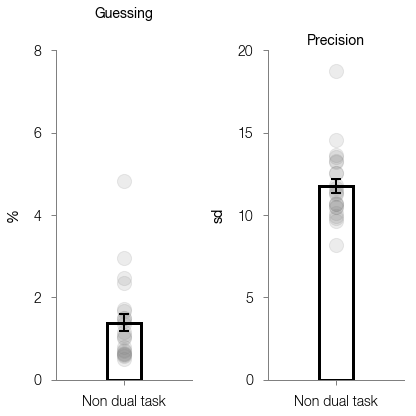

In [14]:
mat_contents = sio.loadmat('../' + project_name +'/results/mixturemodel.mat',struct_as_record=False)
mixmodel = mat_contents['mixmodel'][0][0].model_fit

#Print 95% confidence intervals for whole report accuracy
g = mixmodel[:,0]*100
CIs = bootstrap.ci(data=(g), statfunction=scipy.mean,n_samples=10000)
print("Guessing (g):", np.round(np.mean(g),decimals=2), np.round(CIs,decimals=2))

sd = mixmodel[:,1]
CIs = bootstrap.ci(data=(sd), statfunction=scipy.mean,n_samples=10000)
print("Precision (sd):", np.round(np.mean(sd),decimals=2), np.round(CIs,decimals=2))
    
def scatter_plot_data(ax,data,x=0,c='k'):
    n = np.size(data)
    ax.scatter(np.zeros(n)+x,data,s=200,facecolor='gray',alpha=.15,clip_on=False)#data points
    ax.bar(x,np.mean(data),.25,color='None',edgecolor=c,linewidth=3)
    ax.errorbar(x,np.mean(data),yerr=np.std(data)/np.sqrt(n),color='k',linewidth=2,capsize=5,capthick=2)#error bar



fig,ax = plt.subplots(1,2,figsize=(6,6))

scatter_plot_data(ax[0],mixmodel[:,0]*100,x=1,c='k')
prettify_plot(ax[0],ylim=[0,8],yt=([0,2,4,6,8]),ytl=([0,2,4,6,8]),yl="%",ylrot=90,
              xlim=(.5,1.5), xt=([1]),xtl=(['Non dual task']),
              t='Guessing')

scatter_plot_data(ax[1],mixmodel[:,1],x=1,c='k')
prettify_plot(ax[1],ylim=[0,20], yt=([0,5,10,15,20]),ytl=([0,5,10,15,20]),yl="sd",ylrot=90,
              xlim=(.5,1.5),xt=([1]),xtl=(['Non dual task']),
              t='Precision')


In [16]:
for isubj in range(nsubj):
    print(g[isubj])

1.7246345015057059
1.0495562038927515
0.8013848897874685
1.3530739683103277
1.6697751588723113
1.0227470785840356
1.0859834280005012
0.7179144447960062
2.482752033867206
1.5096017304746308
0.5128832776567213
0.6345149538504682
1.4334514977510597
4.832447631457675
2.357090917099832
1.160650778736924
0.582043110641966
2.9475910461368637
0.6062922559857702
1.4937093025514268
0.6507534346676036
0.7012549267037245
0.6185551205630907
